In [45]:
import os

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [46]:
sns.set()
sns.set_context("paper", font_scale=1.2)

In [47]:
df = pd.read_csv("matching_scores.csv")
# drop the first column
df = df.drop(df.columns[0], axis=1)
# set the index to the file_name
df = df.set_index('file_name')
df.index = df.index.map(lambda x: x[x.rfind('/') + 1:])

In [48]:
# get the list of files in folder that is .png
files = [file for file in os.listdir('.') if file.endswith('.png')]
files_idx = [int(file[:file.find('.')]) for file in files]
# df_best replace file_name with index mapped
df['file_name'] = df.index.map(lambda x: files_idx[files.index(x)])
df['file_name_string'] = df.index
df.reset_index(inplace=True, drop=True)

In [49]:
df['unique_index'] = df.index

In [50]:
df_copy = df
df_best = df_copy.sort_values(by='max_val').groupby('file_name').last()
df_best['pitch_diff'] = df_best['pitch'].diff().abs()
df_best['pitch_diff'][0] = df_copy.iloc[-1]['pitch'] - df_copy.iloc[0]['pitch']
df_best['pitch_diff'] = df_best['pitch_diff'].apply(lambda x: x if x < 180 else 360 - x)

/var/folders/cr/fk05n77x7l59vt1zwmvrl4yc0000gn/T/ipykernel_32260/3878040909.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_best['pitch_diff'][0] = df_copy.iloc[-1]['pitch'] - df_copy.iloc[0]['pitch']


/Users/mikkel/repos/RRTNCTTASA/python-version/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mikkel/repos/RRTNCTTASA/python-version/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mikkel/repos/RRTNCTTASA/python-version/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mikkel/repos/RRTNCTTASA/python-version/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

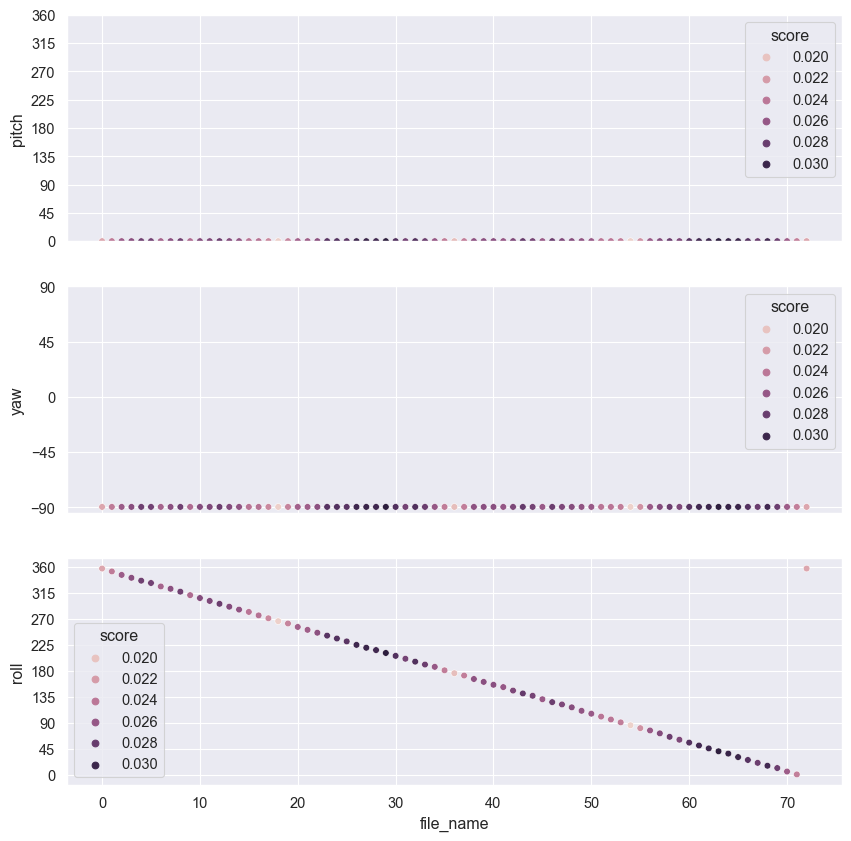

In [39]:
# plot roll, pitch, yaw in subplots with score as hue and file_name as x
fig, axes = plt.subplots(3, 1, figsize=(10, 10), sharex=True)
sns.scatterplot(ax=axes[0], data=df_best, x='file_name', y='pitch', hue='score');
axes[0].set_yticks(range(0, 361, 45));
sns.scatterplot(ax=axes[1], data=df_best, x='file_name', y='yaw', hue='score');
axes[1].set_yticks(range(-90, 91, 45));
sns.scatterplot(ax=axes[2], data=df_best, x='file_name', y='roll', hue='score');
axes[2].set_yticks(range(0, 361, 45));

In [40]:
df_copy.sort_values(by='max_val').groupby('file_name').last()

,rotation,max_val,rotation_reverse,max_val_reverse,translation,x,y,z,score,reversed_diff,...,channel,roll,pitch,yaw,channel_reverse,roll_reverse,pitch_reverse,yaw_reverse,file_name_string,unique_index
file_name,,,,,,,,,,,,,,,,,,,,,
0,"pitch/theta/X: 0.00, yaw/phi/Y: -89.55, roll/Z...",143.658840,"pitch/theta/X: 0.00, yaw/phi/Y: -89.55, roll/Z...",142.331197,"x: -0.11, y: -0.74, z: 21.41",-0.110484,-0.736563,21.411713,0.021444,-1.327643,...,rg,357,0.0,-89.55,rg,357,0.0,-89.55,0.png,25
1,"pitch/theta/X: 0.00, yaw/phi/Y: -89.55, roll/Z...",144.515449,"pitch/theta/X: 0.00, yaw/phi/Y: -89.55, roll/Z...",143.457930,"x: -0.17, y: -0.72, z: 21.31",-0.174143,-0.724067,21.314904,0.023790,-1.057519,...,rg,352,0.0,-89.55,rg,352,0.0,-89.55,1.png,81
2,"pitch/theta/X: 0.00, yaw/phi/Y: -89.55, roll/Z...",138.606424,"pitch/theta/X: 0.00, yaw/phi/Y: -89.55, roll/Z...",137.700140,"x: -0.23, y: -0.70, z: 21.27",-0.228695,-0.704379,21.273913,0.025695,-0.906284,...,rg,346,0.0,-89.55,rg,346,0.0,-89.55,2.png,677
3,"pitch/theta/X: 0.00, yaw/phi/Y: -89.55, roll/Z...",138.602017,"pitch/theta/X: 0.00, yaw/phi/Y: -89.55, roll/Z...",137.670699,"x: -0.29, y: -0.69, z: 21.25",-0.292432,-0.685388,21.252350,0.026591,-0.931318,...,rg,341,0.0,-89.55,rg,341,0.0,-89.55,3.png,1263
4,"pitch/theta/X: 0.00, yaw/phi/Y: -89.55, roll/Z...",136.121422,"pitch/theta/X: 0.00, yaw/phi/Y: -89.55, roll/Z...",135.437546,"x: -0.35, y: -0.66, z: 21.22",-0.346770,-0.657038,21.222173,0.027753,-0.683876,...,rg,336,0.0,-89.55,rg,336,0.0,-89.55,4.png,1856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,"pitch/theta/X: 0.00, yaw/phi/Y: -89.55, roll/Z...",137.134935,"pitch/theta/X: 0.00, yaw/phi/Y: -89.55, roll/Z...",135.935473,"x: 0.15, y: -0.73, z: 21.20",0.145873,-0.729365,21.202475,0.029712,-1.199461,...,rg,16,0.0,-89.55,rg,16,0.0,-89.55,68.png,3520
69,"pitch/theta/X: 0.00, yaw/phi/Y: -89.55, roll/Z...",139.708530,"pitch/theta/X: 0.00, yaw/phi/Y: -89.55, roll/Z...",138.541134,"x: 0.08, y: -0.74, z: 21.23",0.082173,-0.739559,21.233399,0.027820,-1.167396,...,rg,12,0.0,-89.55,rg,12,0.0,-89.55,69.png,3569
70,"pitch/theta/X: 0.00, yaw/phi/Y: -89.55, roll/Z...",141.063402,"pitch/theta/X: 0.00, yaw/phi/Y: -89.55, roll/Z...",139.976024,"x: 0.02, y: -0.74, z: 21.28",0.018304,-0.741330,21.284226,0.025599,-1.087378,...,rg,6,0.0,-89.55,rg,6,0.0,-89.55,70.png,3675


In [9]:
# while True:
#     df_best = df_copy.sort_values(by='max_val').groupby('file_name').last()
#     df_best['pitch_diff'] = df_best['pitch'].diff().abs()
#     df_best.iloc[0]['pitch_diff'] = df_copy.iloc[-1]['pitch'] - df_copy.iloc[0]['pitch']
#     df_best['pitch_diff'] = df_best['pitch_diff'].apply(lambda x: x if x < 180 else 360 - x)
#
#     if df_best['pitch_diff'].max() < 40:
#         break
#     else:
#         # find the first index which has pitch_diff > 40
#         # idx = df_best[df_best['pitch_diff'] > 40].index[0]
#         idx = df_best['pitch_diff'].idxmax()
#         unique = df_best.loc[idx]['unique_index']
#         df_copy = df_copy.drop(unique)

In [10]:
len(df_best.index.unique())

73

In [41]:
# only keep 'file_name', 'score', 'pitch', 'yaw', 'roll' columns
df_small = df_best[['file_name_string', 'score', 'pitch', 'yaw', 'roll', 'x', 'y', 'z', 'channel', 'max_val']]

/Users/mikkel/repos/RRTNCTTASA/python-version/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mikkel/repos/RRTNCTTASA/python-version/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mikkel/repos/RRTNCTTASA/python-version/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mikkel/repos/RRTNCTTASA/python-version/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

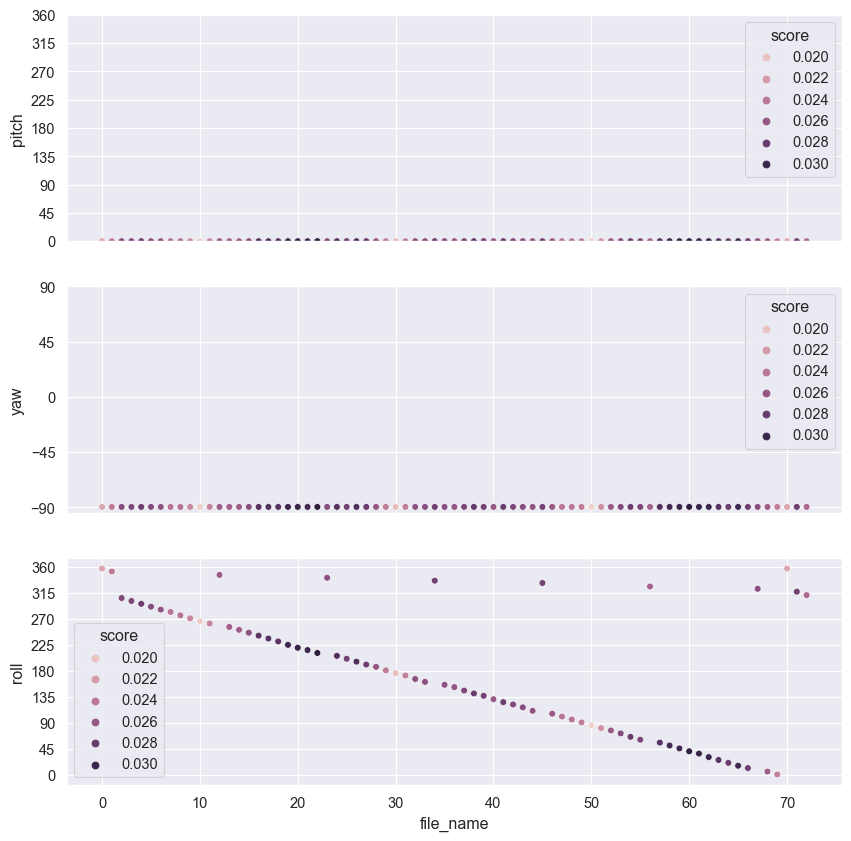

In [12]:
# plot roll, pitch, yaw in subplots with score as hue and file_name as x
fig, axes = plt.subplots(3, 1, figsize=(10, 10), sharex=True)
sns.scatterplot(ax=axes[0], data=df_best, x='file_name', y='pitch', hue='score');
axes[0].set_yticks(range(0, 361, 45));
sns.scatterplot(ax=axes[1], data=df_best, x='file_name', y='yaw', hue='score');
axes[1].set_yticks(range(-90, 91, 45));
sns.scatterplot(ax=axes[2], data=df_best, x='file_name', y='roll', hue='score');
axes[2].set_yticks(range(0, 361, 45));

In [42]:
df_small['roll'].diff().describe()

count     72.000000
mean       0.000000
std       42.550384
min       -6.000000
25%       -5.000000
50%       -5.000000
75%       -5.000000
max      356.000000
Name: roll, dtype: float64

/Users/mikkel/repos/RRTNCTTASA/python-version/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mikkel/repos/RRTNCTTASA/python-version/.venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


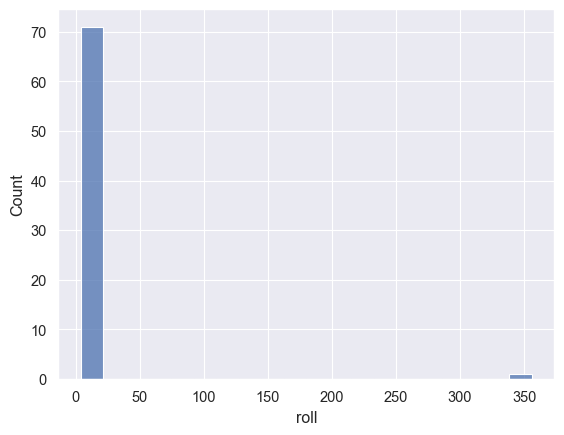

In [43]:
# find delta values for roll
# plot as histogram absoulte values
sns.histplot(df_small['roll'].diff().abs(), bins=20);

In [44]:
df_small.drop(['channel', 'max_val'], axis=1).to_csv("best_scores.csv")

In [98]:
import cv2 as cv

In [176]:
# go trough all files in folder and according to the channel in df_small replace the file with only the channel
dir = 'matching images roll'
for file in os.listdir(dir):
    try:
        if file.endswith('.png'):
            channel = df_small['channel'][int(file[:file.find('.')])]
            img = cv.imread(dir + "/" + file)
            blue_channel, green_channel, red_channel = cv.split(img)
            if channel == "rgb":
                img = cv.add(red_channel, cv.add(blue_channel, green_channel))
                cv.imwrite(dir + "/" + file, img)
            elif channel == "rg":
                img = cv.add(red_channel, green_channel)
                cv.imwrite(dir + "/" + file, img)
            elif channel == "rb":
                img = cv.add(red_channel, blue_channel)
                cv.imwrite(dir + "/" + file, img)
            elif channel == "gb":
                img = cv.add(green_channel, blue_channel)
                cv.imwrite(dir + "/" + file, img)
    except:
        print("could not find file " + file)
